<a href="https://colab.research.google.com/github/alexlapshov89/ALapshov_coding/blob/main/math%26ml_7_part02_hw_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Skillfactory/MATH&ML-7 Теория вероятности в контексте НБК/data/spam_or_not_spam.zip')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

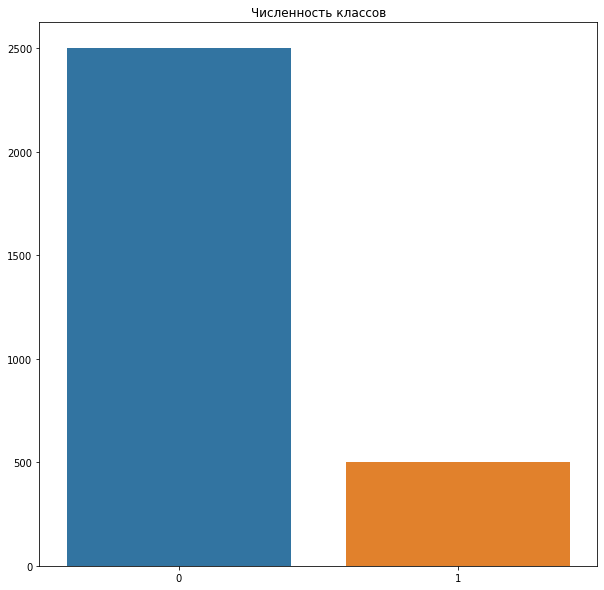

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(data=data,
            x=data['label'].value_counts().index,
            y=data['label'].value_counts().values,
            ax=ax)
ax.set_title('Численность классов');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [7]:
data  = data.dropna()

Переводим данные в векторный вид:

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [9]:
print('Количество признаков после векторизации:',X.shape[1])

Количество признаков после векторизации: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [10]:
y = data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [12]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [13]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [14]:
from sklearn import metrics

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precission: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1-score: ',metrics.f1_score(y_test,y_pred))

accuracy:  0.9946666666666667
precission:  0.983739837398374
recall:  0.983739837398374
f1-score:  0.983739837398374


Нарисуйте ROC-кривую:

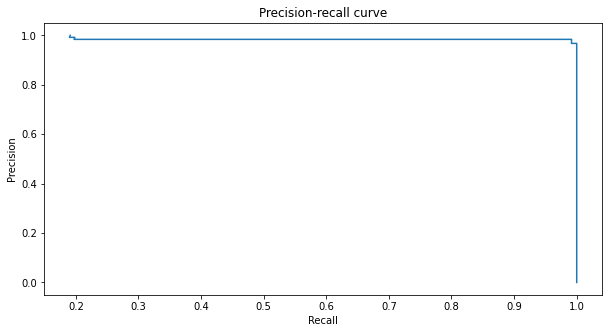

In [15]:
# Массив вероятностей
y_pred_prob = model.predict_proba(X_test)
precision_model_1, recall_model_1, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob[:,1])
#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(precision_model_1, recall_model_1)
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision');

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

accuracy на тестовом наборе: 1.00
f1_score на тестовом наборе: 0.99
Наилучшие значения гиперпараметров: {'alpha': 0.11}


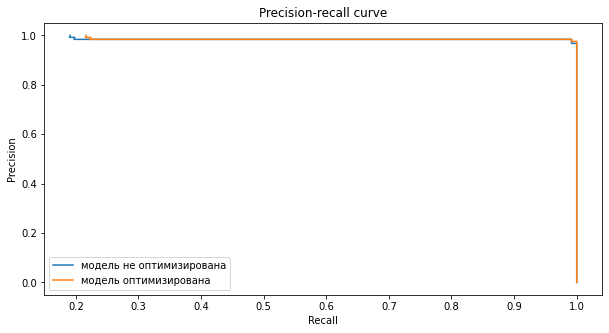

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Модель с оптимизируемым параметром alpha
param_grid = {'alpha': np.arange(0.01,1.01,0.05)}
grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test,y_test_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
# Визуализация для оценки качества предсказания (ROC)
y_pred_prob = grid_search.predict_proba(X_test)
precision_model_2, recall_model_2, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob[:,1])
#Строим PR-кривую для модели до оптимизации и после
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(precision_model_1, recall_model_1, label='модель не оптимизирована')
ax.plot(precision_model_2, recall_model_2, label='модель оптимизирована')
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend();

Подбор параметра **alpha** в сочетании с кросс-валидацией показал небольшое улучшение качества предсказания: площадь по графиком ROC-кривой почти не изменилась, кривые накладываются друг на друга при визуализации.